# Template for the data structure 

We want to all use the same data structure as below


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import h5py
from io import StringIO


In [2]:
import pandas as pd

# Define columns, with key quantities stored as lists: [err-, value, err+]
columns = [
    "System Name", "RA", "Dec", "Period", "Eccentricity",
    "M1","M1_sin3i", "M2", "M2_sin3i", "q", "Mass Function",
    "Type1", "Type2", "Detection Method", "Reference", "Notes"
]

# Initialize empty DataFrame
example_obs_df = pd.DataFrame(columns=columns)

# Define helper function using [err-, value, err+] triplets
def add_observation(df, system_name,
                    ra, dec, period, ecc,
                    m1, m1_sin3i, m2, m2_sin3i, q, mass_func,
                    type1, type2, method, reference, notes=""):
    # use np.inf if it is a lower limit (0 if it is an upper limit)
    new_row = {
        "System Name": system_name,
        "RA": ra,                           # [err-, value, err+])
        "Dec": dec,                         # [err-, value, err+]

        "Period": period,                   # day [err-, value, err+]
        "Eccentricity": ecc,                # [err-, value, err+ ]

        "M1": m1,                           # Accretor star [err-, value, err+]
        "M1_sin3i": m1_sin3i,               # M1 sini^3 values [err-, value, err+] (= lower limit on m1)
        "M2": m2,                           # Donor (post MT 1) [err-, value, err+,]
        "M2_sin3i": m2_sin3i,               # M2 sini^3 values [err-, value, err+] (= lower limit on m2)
        "q": q,                             # M2/M1 = donor/accretor [err-, value, err+, lower/upper limit? ]
        "Mass Function": mass_func,         # [err-, value, err+, lower/upper limit? ]

        "Type1": type1,                     # ["MS", "WD", "NS", "BH" "RG", "O", "B" ]
        "Type2": type2,                     # ["MS", "WD", "NS", "BH" "RG", "O", "B" ]
        "Detection Method": method,         # list of strings ["Xray", "RV"= Radial velocity, "EB"=Eclipsing binary, "AB" = Astrometric binary, "Other"]  
        "Reference": reference,             # ADS Bibcode    
        "Notes": notes
    }
    return pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Example: Add two entries
example_obs_df = add_observation(
    example_obs_df,
    "Example system",
    [0.005, 150.025, 0.005],        # RA
    [0.004, -45.123, 0.004],        # Dec

    [0.2, 12.5, 0.3],            
    # Period in days
    [0.02, 0.30, 0.03],             # Eccentricity
    [0.5, 5.0, 0.5],                # M1 values
    [0.5, 2.0, 0.5],                # M1 sini^3 values (= lower limit on m1)
    [0.2, 2.5, 0.3],                # M2 in Msun
    [0.5, 1.0, 0.5],                # M2 sini^3 values (= lower limit om m2)
    [0.03, 0.25, 0.04],             # q (mass ratio)
    [0.01, 1e-3, 0.02],             # Mass Function
    
    "MS",                            # Type1
    "WD",                            # Type2
    ["RV", "EB"],                    # Detection Method
    ["2025arXiv250514780L"],           # Reference (use Ads Bibcode)
    "This is an example system ",    # Notes
)


# Example: Add two entries
example_obs_df = add_observation(
    example_obs_df,
    "Example system 2",
    [0.005, 159.025, 0.005],        # RA
    [0.004, -45.123, 0.004],        # Dec

    [0.2, 12.5, 0.3],            
    # Period in days
    [0.02, 0.50, 0.03],             # Eccentricity
    [0.5, 10.0, 0.5],                # M1 values
    [0.5, 3.0, 0.5],                # M1 sini^3 values (= lower limit on m1)
    [0.2, 5, 0.3],                # M2 in Msun
    [0.5, 1.0, 0.5],                # M2 sini^3 values (= lower limit om m2)
    [0.03, 0.9, 0.04],             # q (mass ratio)
    [0.01, 1e-3, 0.02],             # Mass Function
    
    "MS",                            # Type1
    "WD",                            # Type2
    ["RV", "EB"],                    # Detection Method
    ["2025arXiv250514780L"],           # Reference (use Ads Bibcode)
    "This is an example system ",    # Notes
)


# Example: Add entries
example_obs_df = add_observation(
    example_obs_df,
    "Example system 3",
    [0.005, 159.025, 0.005],        # RA
    [0.004, -45.123, 0.004],        # Dec

    [0.2, 12.5, 0.3],            
    # Period in days
    [np.nan, 0.50, np.nan],             # Eccentricity
    [np.nan, np.nan, np.nan],                # M1 values
    [0.5, 3.0, 0.5],                # M1 sini^3 values (= lower limit on m1)
    [0.2, 5, 0.3],                # M2 in Msun
    [0.5, 1.0, 0.5],                # M2 sini^3 values (= lower limit om m2)
    [0.03, 0.9, 0.04],             # q (mass ratio)
    [0.01, 1e-3, 0.02],             # Mass Function
    
    "MS",                            # Type1
    "WD",                            # Type2
    ["RV", "EB"],                    # Detection Method
    ["2025arXiv250514780L"],           # Reference (use Ads Bibcode)
    "This is an example system ",    # Notes
)


#### How to treat missing values? 

Add a `np.nan` values



#### What if you have lower or upper limits? 
We assume there are only lower limits on masses,
If you have a lower limit on the mass, you probably have the `m_1 sin(i)^3` value, so use the appropriate column for that

 
#### What if you have pulled your values from multiple references?
If your values were pulled from different sources, add a list of strings to the `Reference` column
i.e.:  
```python
["2025arXiv250514780L", "2021AJ....161..248W"]
```


In [3]:
display(example_obs_df)

,System Name,RA,Dec,Period,Eccentricity,M1,M1_sin3i,M2,M2_sin3i,q,Mass Function,Type1,Type2,Detection Method,Reference,Notes
0,Example system,"[0.005, 150.025, 0.005]","[0.004, -45.123, 0.004]","[0.2, 12.5, 0.3]","[0.02, 0.3, 0.03]","[0.5, 5.0, 0.5]","[0.5, 2.0, 0.5]","[0.2, 2.5, 0.3]","[0.5, 1.0, 0.5]","[0.03, 0.25, 0.04]","[0.01, 0.001, 0.02]",MS,WD,"[RV, EB]",[2025arXiv250514780L],This is an example system
1,Example system 2,"[0.005, 159.025, 0.005]","[0.004, -45.123, 0.004]","[0.2, 12.5, 0.3]","[0.02, 0.5, 0.03]","[0.5, 10.0, 0.5]","[0.5, 3.0, 0.5]","[0.2, 5, 0.3]","[0.5, 1.0, 0.5]","[0.03, 0.9, 0.04]","[0.01, 0.001, 0.02]",MS,WD,"[RV, EB]",[2025arXiv250514780L],This is an example system
2,Example system 3,"[0.005, 159.025, 0.005]","[0.004, -45.123, 0.004]","[0.2, 12.5, 0.3]","[nan, 0.5, nan]","[nan, nan, nan]","[0.5, 3.0, 0.5]","[0.2, 5, 0.3]","[0.5, 1.0, 0.5]","[0.03, 0.9, 0.04]","[0.01, 0.001, 0.02]",MS,WD,"[RV, EB]",[2025arXiv250514780L],This is an example system


# When you are done creating your table, stack the triplet columns to make them much more accessible

In [12]:
# Extend the HDF5 saving function to include metadata
def save_triplet_columns_and_metadata(df, triplet_columns, h5_filename):
    with h5py.File(h5_filename, "w") as f:
        # Save each triplet column as a dataset
        for col in triplet_columns:
            try:
                arr = np.vstack(df[col].values)  # Shape (N, 3)
                f.create_dataset(col, data=arr)
            except Exception as e:
                print(f"Skipping column '{col}' due to: {e}")
        
        # Save all other columns as metadata in JSON format
        metadata_cols = [col for col in df.columns if col not in triplet_columns]
        metadata_df = df[metadata_cols]

        # Convert to JSON-serializable format and store as a string
        meta_json = metadata_df.to_json(orient="records")
        f.create_dataset("metadata_json", data=np.bytes_(meta_json))

#


In [ ]:
#  Run the function with metadata saving
triplet_cols = ["RA", "Dec", "Period", "Eccentricity", "M1", "M1_sin3i", "M2", "M2_sin3i", "q", "Mass Function"]
save_triplet_columns_and_metadata(example_obs_df, triplet_cols, "../result_tables/example_obs_df_full.h5")


## This is how you read your data again:



In [ ]:

with h5py.File( "../result_tables/example_obs_df_full.h5", "r") as f:
    # Load triplet arrays
    eccentricity = f["Eccentricity"][:]
    mass1 = f["M1"][:]

    # Load and parse metadata
    metadata_json = f["metadata_json"][()].decode("utf-8")
    metadata_df = pd.read_json(StringIO(metadata_json), orient="records")

print(metadata_df.keys() )

print(metadata_df['System Name'])

print(eccentricity)

Index(['System Name', 'Type1', 'Type2', 'Detection Method', 'Reference',
       'Notes'],
      dtype='object')
0      Example system
1    Example system 2
2    Example system 3
Name: System Name, dtype: object
[[0.02 0.3  0.03]
 [0.02 0.5  0.03]
 [ nan 0.5   nan]]


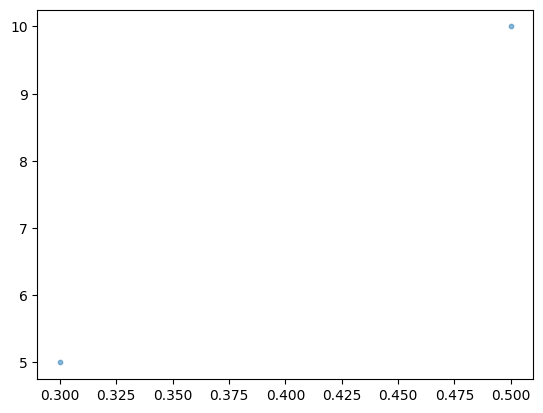

In [15]:
plt.scatter(eccentricity[:,1], mass1[:,1], marker='o', s=10, alpha=0.5)